In [1]:
from quantum_dataset import QM7, QM7b, QM7X, QM9, ANI1x, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet, SetTransformer
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss, 
      batch_size=256, epochs=10, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 10*10, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb'], 
             'target': 'U0',
             'pad': 10, 
             'filter_on': ('n_atoms','>','10'),
             'use_pickle': False}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=4, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'quantum_dataset.ANI1x'> dataset created...
model loaded from state_dict...
epoch: 0 of 10, train loss: 99.63079539837587, val loss: 60.09722175108841
epoch: 1 of 10, train loss: 51.99132625775195, val loss: 38.828258859811584
epoch: 2 of 10, train loss: 42.47473802547739, val loss: 47.91907703230537
epoch: 3 of 10, train loss: 41.38861344926509, val loss: 39.08208402126697
epoch: 4 of 10, train loss: 34.62591734191922, val loss: 55.92541964631655
epoch: 5 of 10, train loss: 38.822720812859814, val loss: 49.845651341519456
epoch: 6 of 10, train loss: 42.95208779472462, val loss: 41.869429580027045
epoch: 7 of 10, train loss: 38.85688020682467, val loss: 32.956590374679884
epoch: 8 of 10, train loss: 32.67738198028237, val loss: 26.021173534078315
epoch: 9 of 10, train loss: 37.01488876331708, val loss: 45.093568072842956
test loss: 46.74107721303717
y_pred:
tensor([[ -613.2756],
        [ -342.5166],
        [ -576.2786],
        [ -423.9948],
        [ -581.9558],
        [ -34

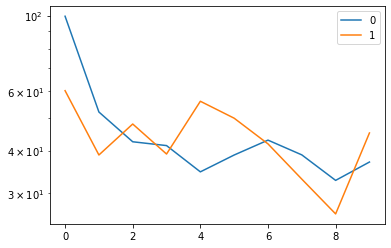

learning time: 0:00:22.348211


In [3]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 64*63+63+63+63, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': ['atomic_numbers','coordinates'],
             'targets': ['wb97x_dz.energy'],
             'embed': [(9,64,True)],
             'pad': 63, #length of the longest molecule in the dataset
             'criterion': None,
             'conformation': 'random',
             'in_file': './data/ani1/ani1x-release.h5'}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88} #deterministic train/test set selection

learn = Learn(Dataset=ANI1x, Model=FFNet, Sampler=Selector, Optimizer=Adam, 
              Criterion=L1Loss, batch_size=128, epochs=10, opt_params=opt_params, 
              model_params=model_params, ds_params=ds_params, crit_params=crit_params, 
              sample_params=sample_params, save_model=False, load_model='20201230_1317.pth',
              load_embed=False)


In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=True, load_model=False)

In [ ]:
model_params = {'D_in': 128+32+64+32+64, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': False,
             'use_h5': False,  
             'infer': True}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20201021_2101.pth', adapt=False)

In [ ]:
ds_params = {'features': 
                 ['DIP','HLgap','KSE','atC6','atNUM','atPOL','atXYZ', 
                 'eC','eDFTB+MBD','eEE','eH','eKIN','eKSE','eL','eMBD',
                 'eNE','eNN','ePBE0','ePBE0+MBD','eTS','eX','eXC','eXX',
                 'hCHG','hDIP','hRAT','hVDIP','hVOL','mC6','mPOL','mTPOL',
                 'pbe0FOR','sMIT','sRMSD','totFOR','vDIP','vEQ','vIQ',
                 'vTQ','vdwFOR','vdwR'],
             'pad': 1024,
             'target': ['eAT'],
             'selector': ['i1-c1-opt']}

opt_params = {'lr': 0.001}

model_params = {'D_in': 1024, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

crit_params = {'reduction': 'sum'}

sample_params = {'split': .1, 'subset': False}

Learn(Dataset=QM7X, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=256, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

In [ ]:
ds_params = {'n': 133885, 
             'features': ['coulomb'], 
             'target': 'U0',
             'pad': 10, 
             'filter_on': ('n_atoms','>','10'),
             'use_pickle': 'qm9_n_atoms_10_or_less.p'}

opt_params = {'lr': 0.001}

model_params = {'dim_input': 100,
                'num_outputs': 1,
                'dim_output': 1,
                'num_inds': 32,
                'dim_hidden': 128,
                'num_heads': 4,
                'ln': False}

crit_params = {'reduction': 'sum'}

sample_params = {'split': .1, 'subset': False}

Learn(Dataset=QM9, Model=SetTransformer, Sampler=Selector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=4, epochs=2, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

In [ ]:
ds_params = {'features': ['atomic_numbers','coordinates'],
             'targets': ['wb97x_dz.energy'],
             'embed': [(9,64,True)],
             'pad': 63, #length of the longest molecule in the dataset
             'criterion': None,
             'conformation': 'random',
             'in_file': './data/ani1/ani1x-release.h5'}

ani1x = ANI1x(**ds_params)

In [ ]:
len(ani1x.ds_idx)

In [ ]:
ani1x.ds_idx[:10]

In [ ]:
ani1x.datadic['C10H10']

In [ ]:
ani1x['C10H10']

In [ ]:
ds_params = {'features': ['coordinates','atomic_numbers'],
             'targets': ['wb97x_dz.energy'], 
             'pad': False,
             'criterion': 'ccsd(t)_cbs.energy',
             'conformation': 'min',
             'in_file': './data/ani1/ani1x-release.h5'}

ani1x = ANI1x(**ds_params)

#find the length of the longest molecule
#lg = 0
#for mol in ani1x.ds_idx:
#    val = ani1x[mol]
#    sz = val[0].shape[0]
#    if sz > lg:
#        lg = sz
#print(lg)

In [ ]:
len(ani1x.ds_idx)

In [ ]:
list(ani1x.ds_idx)[:10]

In [ ]:
ani1x['C1H4N4O4']